In [2]:
import sys
from openbb import obb
sys.path.append(r'C:\Users\avido\Documents\other code\AlgoTrading')
from assets.api_credentials import openbb_pat
obb.account.login(pat=openbb_pat, remember_me=True)
import utils.local_data_interface as ldi

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


%load_ext autoreload
%autoreload 2

In [9]:
# get date 3 months ago 
date_3_months_ago = datetime.today() - timedelta(days=90)
date_3_months_ago = date_3_months_ago.replace(hour=0, minute=0, second=0, microsecond=0)

today = datetime.today()
today = today.replace(hour=0, minute=0, second=0, microsecond=0)

historical_price = obb.currency.price.historical(symbol='EURUSD', start_date=date_3_months_ago, end_date=today, interval='1d')

In [11]:
historical_price.to_dataframe()

,open,high,low,close,volume,vwap,adj_close,change,change_percent
date,,,,,,,,,
2025-01-20,1.02792,1.04342,1.02659,1.04159,320143.0,1.03488,1.04159,0.01367,0.013299
2025-01-21,1.04159,1.04350,1.03413,1.04242,359496.0,1.04041,1.04242,0.00083,0.000797
2025-01-22,1.04242,1.04571,1.03916,1.04081,246906.0,1.04203,1.04081,-0.00161,-0.001545
2025-01-23,1.04081,1.04376,1.03713,1.04148,271236.0,1.04080,1.04148,0.00067,0.000644
2025-01-24,1.04148,1.05211,1.04112,1.04918,299680.0,1.04597,1.04918,0.00770,0.007393
...,...,...,...,...,...,...,...,...,...
2025-04-14,1.13208,1.14242,1.12956,1.13499,532191.0,1.13476,1.13499,0.00291,0.002570
2025-04-15,1.13499,1.13787,1.12637,1.12789,381640.0,1.13178,1.12789,-0.00710,-0.006256
2025-04-16,1.12789,1.14125,1.12781,1.13981,454752.0,1.13419,1.13981,0.01192,0.010568


In [15]:
currency_pairs = ['EURUSD', 'GBPUSD', 'JPYUSD', 'AUDUSD', 'CADUSD', 'CHFUSD', 'NZDUSD', 'SEKUSD', 'NOKUSD', 'HKDUSD', 'SGDUSD', 'ZARUSD', 'MXNUSD', 'PLNUSD', 'BRLUSD', 'THBUSD', 'TRYUSD', 'INRUSD', 'RUBUSD', 'CNYUSD', 'IDRUSD', 'MYRUSD', 'PHPUSD', 'TWDUSD', 'VNDUSD']
# get date 3 months ago 
date_3_months_ago = datetime.today() - timedelta(days=90)
date_3_months_ago = date_3_months_ago.replace(hour=0, minute=0, second=0, microsecond=0)

# get data
ticker_data = {}
for ticker in currency_pairs:
    ticker_data[ticker] = ldi.get_ticker(ticker, start_date=date_3_months_ago, interval='1d', end_date = None)


### Plot trend over time

C:\Users\avido\AppData\Local\Temp\ipykernel_54416\423971643.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(data['close']/data['close'][0], label=ticker)


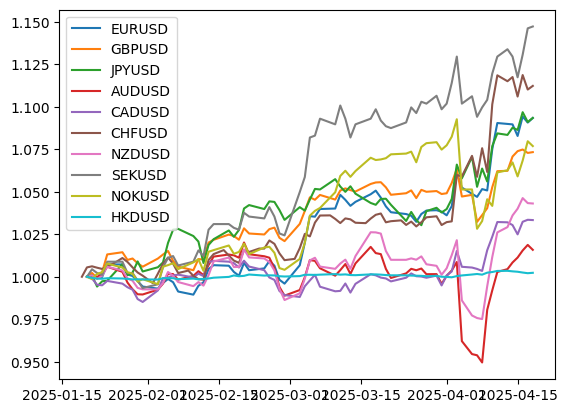

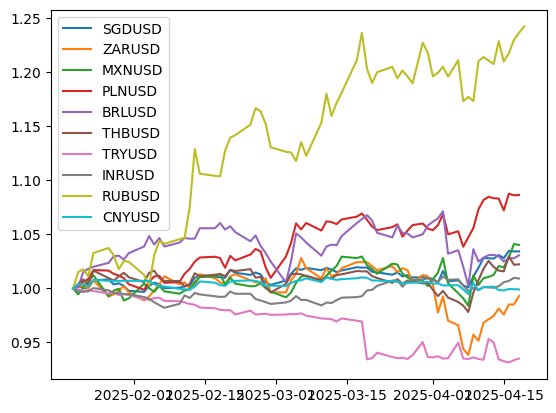

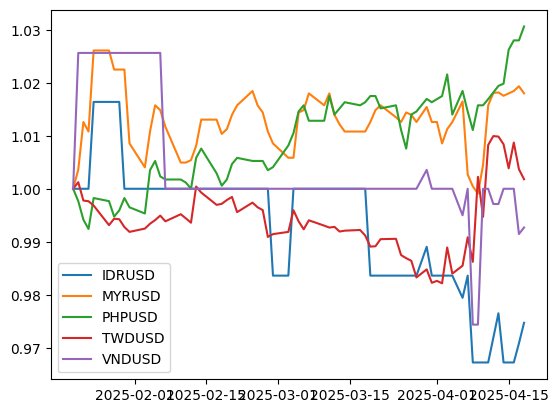

In [16]:
i = 0
for ticker, data in ticker_data.items():
    plt.plot(data['close']/data['close'][0], label=ticker)
    i += 1
    if i % 10 == 0:
        #shoe legend on left side of the plot
        plt.legend(loc='upper left')
        plt.show()
plt.legend()
plt.show()